<a href="https://colab.research.google.com/github/wksiazak/Diabetes-Logistic-Regression/blob/master/Kopia_1_Regresja_logistyczna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wstęp

W tej części zajmiemy się najprostszym modelem klasyfikacyjnym jakim jest regresja logistyczna. Nazwa 'regresja' może być myląca, jednak regresja logistyczna również pochodzi od modelu liniowego. Dzięki odpowiedniemu przekształceniu jest w stanie rozwiązywać zadania klasyfikacyjne. Oprócz regresji logistycznej omówimy sobie dokładniej temat niezbalansowanego zbioru danych i poznamy sposoby, jak z takim zbiorem danych możemy sobie radzić.

# Opis modelu

Jak pamiętamy z wcześniejszych materiałów, regresja liniowa ma postać

$h(X) = \beta_{0}+\beta_1X$.

W przypadku regresji logistycznej, zależność ta jest modyfikowana do postaci

$\sigma(Z) = \sigma(\beta_0+\beta_1X)$,

co możemy zapisać jako

$h(X) = sigmoid(Z)$,

gdzie $Z = \beta_0+\beta_1X$.

Ostatecznie regresja logistyczna wyrażona jest wzorem:

$h(X) = \frac{1}{1+e^{-Z}} = \frac{1}{1+e^{-(\beta_0+\beta_1X)}}$.

Wizualizacja regresji logistycznej wygląda następująco:

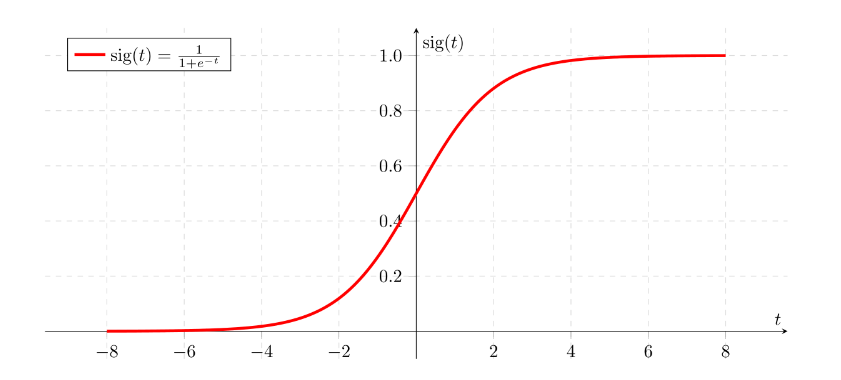

źródło: [link](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

Regresja logistyczna, inaczej nazywana funkcją sigmoidalną, ma charakterystyczny kształt litery 'S'. Przyjmuje wartości od 0 do 1. Dzięki swojej charakterystyce, stosowana jest głównie do rozwiązywania problemów binarnych (0/1). Oprócz predykcji konkretnych klas, możemy również za jej pomocą zwrócić informacje o prawdopodobieństwach wystąpienia danej klasy.

Analogicznie jak w przypadku regresji liniowej, w modelu regresji logistycznej również należy zadbać o dodanie regularyzacji w celu uniknięcia zbyt mocnego dopasowania modelu do danych treningowych. Do wyboru mamy regularyzację L1 i L2.

W przypadku klasyfikacji wieloklasowej również możemy zastosować regresję logistyczną. W takim wypadku każdy przypadek rozważany jest metodą jeden do reszty (*ang. One vs Rest*). Metoda ta została zaprezentowana na poniższym rysunku.

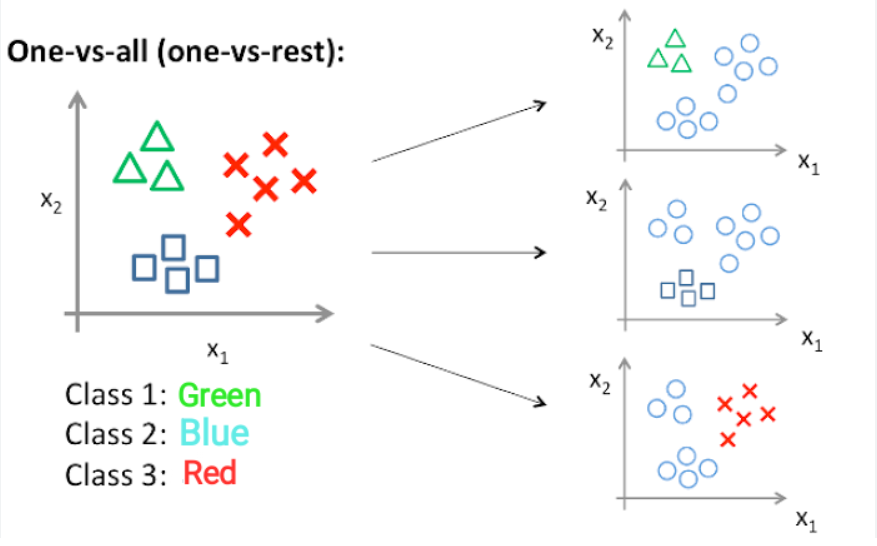

źródło: [link](https://towardsdatascience.com/multi-class-classification-one-vs-all-one-vs-one-94daed32a87b)

Widzimy, że w przypadku klasyfikacji poszczególnych klas, pozostałe klasy traktowane są jako jeden zbiór.

# Przykłady

Przykład regresji logistycznej wykonamy na zbiorze danych *titanic.csv*. Na podstawie zawartych w nim danych możemy zbudować algorytm, którego celem będzie przewidzenie, czy pasażer przeżył rejs statkiem, czy nie.

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv('titanic.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Patrząc na zbiór danych widzimy, że w kilku kolumnach występują braki danych. Dodatkowo nie wszystkie kolumny będą nam potrzebne do budowy modelu predykcyjnego. W związku z tym, zanim przejdziemy do tego etapu, musimy najpierw przygotować dane. Możemy usunąć kolumny *PassengerId*, *Name*, *Ticket* i *Cabin*. Braki danych w kolumnach *Age* i *Embarked* należy wypełnić odpowiednimi wartościami oraz wartości w kolumnach *Sex* i *Embarked* zamienić na wartości liczbowe.

In [ ]:
# usuwanie niepotrzebnych kolumn
titanic.drop(columns=['PassengerId', 'Name', 'Ticket','Cabin'], inplace=True)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# zamiana wartości w kolumnie Sex na wartości liczbowe
titanic['Sex'] = titanic['Sex'].astype('category').cat.codes

# wypełnienie braków danych w kolumnie Embarked
# braki danych w kolumnie Embarked wypełniamy wartością S, ponieważ jest wartością najczęściej występującą w tej kolumnie
titanic['Embarked'].fillna('S', inplace=True)

Oprócz funkcji `fillna()` do wypełnienia braków danych możemy również wykorzystać funkcję `SimpleImputer()` dostępną w bibliotece `sklearn`.

Wewnątrz funkcji należy zdefiniować następujące parametry:
- `missing_values`: rodzaj wartości, jaką chcemy zastąpić; domyślnie jest to `np.nan`, ale możemy również zdefiniować konkretną wartość liczbową czy tekstową,
- `strategy`: w jaki sposób mają zostać zastąpione wartości; do wyboru mamy `mean`, `median`, `most_frequent`, `constant`.

Więcej na temat funkcji `SimpleImputer()` możesz znaleźć [tutaj](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html).

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
titanic['Embarked']=imputer.fit_transform(titanic[['Embarked']])

In [ ]:
# zastąpienie stringów na wartości liczbowe w kolumnie Embarked
titanic['Embarked'] = titanic['Embarked'].astype('category').cat.codes

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
# wypełnianie braków danych w kolumnie Age
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
titanic['Age'] = imputer.fit_transform(titanic[['Age']])

Kiedy mamy już przygotowane dane, możemy przejść do wyznaczenia zmiennych X i y, wyodrębnienia zbioru treningowego i testowego i budowy modelu predykcyjnego.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# zdefiniowanie zmiennych X i y do modelu
y = titanic.pop('Survived')
X = titanic

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [ ]:
# podział na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
from sklearn.linear_model import LogisticRegression

Do budowy modelu regresji logistycznej służy funkcja `LogisticRegression()`. Możemy uruchomić funkcję bez podawania dodatkowych parametrów albo zdefiniować własnoręcznie między innymi:
- regularyzację za pomocą parametru `penalty` (domyślnie L2),
- moc regularyzacji za pomocą parametru `C`- parametr musi przyjmować wartości dodatnie; im mniejsza wartość tym większa moc regularyzacji,
- `multiclass` w przypadku klasyfikacji wieloklasowej

In [ ]:
# inicjalizacja regresji logistycznej
model = LogisticRegression()
# trenowanie modelu
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# wyliczenie predykcji
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0])

Oprócz wyznaczania predykcji konkretnych klas, regresja logistyczna umożliwia nam również wyznaczenie prawdopodobieństw dla klas. Możemy je wyliczyć za pomocą metody `predict_proba()`.

In [ ]:
# przewidywanie prawdopodobieństw dla poszczególnych klas
y_pred_proba = model.predict_proba(X_test)

Analizując wyniki widzimy, że dla pierwszej obserwacji prawdopodobieństwo wyznaczenia klasy 0 wynosiło 24%, natomiast klasa 1 miała prawdopodobieństwo 76%. Warto zauważyć, że prawdopodobieństwa sumują się do 1 w każdym wierszu.

In [ ]:
y_pred_proba

array([[0.24043724, 0.75956276],
       [0.85444642, 0.14555358],
       [0.43451262, 0.56548738],
       [0.77049262, 0.22950738],
       [0.88448964, 0.11551036],
       [0.84546487, 0.15453513],
       [0.25784672, 0.74215328],
       [0.22488928, 0.77511072],
       [0.23911328, 0.76088672],
       [0.39821486, 0.60178514],
       [0.36204037, 0.63795963],
       [0.38793836, 0.61206164],
       [0.19029247, 0.80970753],
       [0.87666026, 0.12333974],
       [0.11255462, 0.88744538],
       [0.23479012, 0.76520988],
       [0.12426912, 0.87573088],
       [0.4874797 , 0.5125203 ],
       [0.6200289 , 0.3799711 ],
       [0.79992747, 0.20007253],
       [0.46188475, 0.53811525],
       [0.09465025, 0.90534975],
       [0.81124869, 0.18875131],
       [0.90584668, 0.09415332],
       [0.91166215, 0.08833785],
       [0.90712651, 0.09287349],
       [0.86621075, 0.13378925],
       [0.04259059, 0.95740941],
       [0.85265664, 0.14734336],
       [0.87334451, 0.12665549],
       [0.

Po wytrenowaniu modelu i wyznaczeniu predykcji, warto sprawdzić, jak nasz model predykcyjny działa i jaką ma dokładność.

W pierwszym kroku stworzymy macierz pomyłek, aby sprawdzić, ile obserwacji zostało błędnie zaklasyfikowanych. Wyliczając macierz pomyłek za pomocą `confusion_matrix` należy pamiętać, że w wierszach mamy wartości rzeczywiste dla poszczególnych klas, a w kolumnach predykcje.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[94, 20],
       [14, 51]])

In [ ]:
import seaborn as sns

<Axes: >

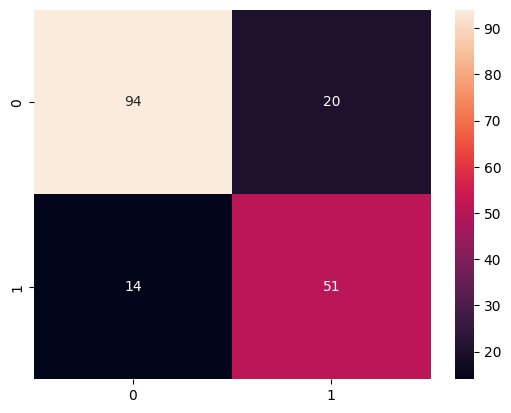

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

Analizując macierz pomyłek widzimy, że w zbiorze testowym mieliśmy 114 obserwacji z klasy 0 i 65 obserwacji z klasy 1. 94 obserwacje zostały prawidłowo zaklasyfikowane jako 0 (osoba nie przeżyła katastrofy) oraz 51 obserwacji zostało prawidłowo zaklasyfikowanych jako 1. Patrząc na zbiór osób, które nie ocalały w katastrofie, 20 z nich zostało błędnie zaklasyfikowanych jako osoby, które przeżyły. Również 14 osób ocalałych zostało błędnie zaklasyfikowanych do grupy 0.

Po wygenerowaniu macierzy pomyłek możemy sprawdzić dokładność modelu za pomocą metryki accuracy.

Dokładność modelu wyniosła 81%.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.8100558659217877

Oprócz accuracy mamy jeszcze miary, takie jak precyzja i recall.

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(y_test, y_pred)

0.7183098591549296

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_test, y_pred)

0.7846153846153846

Zamiast wyliczać wszystkie metryki jedna po drugiej, możemy skorzystać z funkcji `classification_report`. W raporcie będą przedstawione wszystkie potrzebne statystyki z podziałem na klasy.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       114
           1       0.72      0.78      0.75        65

    accuracy                           0.81       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.82      0.81      0.81       179



Analizując raport widzimy, że model radzi sobie lepiej z przewidywaniem klasy 0 niż klasy 1.

Oprócz raportu klasyfikacyjnego możemy również obliczyć AUC oraz narysować krzywą ROC. Krzywą ROC możemy narysować na dwa sposoby: przy użyciu funkcji `RocCurveDisplay`- wówczas jako argumenty podajemy wytrenowany model i wartości ze zbioru testowego oraz za pomocą `roc_curve`- w tym wypadku należy najpierw wyliczyć wartości true positive rate i false positive rate, a następnie narysować krzywą wyznaczoną przez te punkty.

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
# Obliczanie AUC
roc_auc_score(y_test, y_pred)

0.8045883940620782

In [ ]:
from sklearn.metrics import RocCurveDisplay

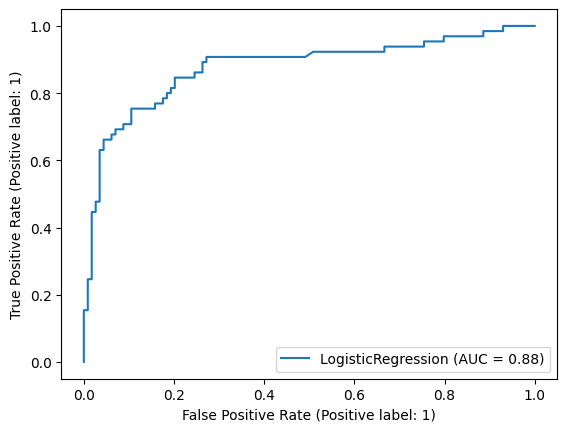

In [ ]:
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [ ]:
# obliczanie true positive rate i false positive rate
fpr, tpr, threshold = roc_curve(y_test, y_pred)

In [ ]:
# generowanie danych pomocniczych
help_prob = [0 for _ in range(len(y_test))]
help_fpr, help_tpr, _= roc_curve(y_test, help_prob)

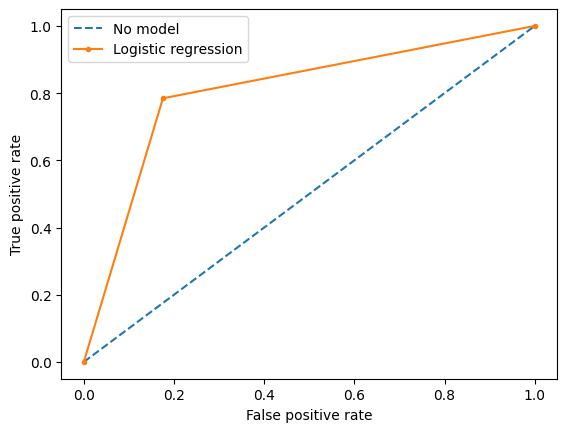

In [ ]:
plt.plot(help_fpr, help_tpr, linestyle='--', label='No model')
plt.plot(fpr, tpr, marker='.', label='Logistic regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

Krzywa na wykresach wyznacza jakość modelu. W przypadku powyższego modelu, przerywana przekątna przedstawia sytuację, w której dokonana byłaby predykcja wartości bez użycia modelu predykcyjnego. Pomarańczowa krzywa reprezentuje jakość modelu regresji logistycznej. Im bardziej ta krzywa odbiega od krzywej pomocniczej w kierunku wartości 1, tym lepszy model.

Tak jak w przypadku regresji liniowej, z modelu regresji logistycznej również możemy wyciągnąć informacje na temat ważności poszczególnych cech w modelu. Wykorzystujemy do tego metodę `coef_`.

In [ ]:
# wypisanie współczynników
model.coef_

array([[-1.03781551e+00, -2.54839133e+00, -3.74237268e-02,
        -3.14638798e-01, -6.64595897e-03,  1.58809487e-03,
        -1.61776950e-01]])

In [ ]:
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":model.coef_[0]})

,Feature,Coefficients
0,Pclass,-1.037816
1,Sex,-2.548391
2,Age,-0.037424
3,SibSp,-0.314639
4,Parch,-0.006646
5,Fare,0.001588
6,Embarked,-0.161777


Na podstawie tabeli widzimy, że największy wpływ na przeżycie miała płeć pasażera i klasa, w której płynął.

# Niezbalansowany zbiór danych

Jak już było wspomniane we wcześniejszych materiałach, czasami zdarza się tak, że nasz zbiór danych jest niezbalansowany, czyli obserwacji w jednej klasie mamy dużo więcej niż w drugiej. Taką sytuację mamy również w przypadku danych z Titanica, ponieważ więcej osób zginęło w katastrofie niż przeżyło, jednak dysproporcja ta nie jest aż tak duża.

W przypadku, gdy mamy do czynienia z silnie niezbalansowanym zbiorem danych albo będzie nam mocno zależało na poprawnym przewidywaniu klasy mniej licznej, warto zastanowić się nad dodatkowym przygotowaniem danych. W przypadku niezbalansowania zbioru możemy wykorzystać jedną z trzech najpopularniejszych metod - Oversampling, Undersampling czy algorytm SMOTE.

Do przeanalizowania działania powyższych algorytmów wygenerujemy dodatkowy zbiór danych za pomocą funkcji `make_classification`. W zbiorze zostanie wygenerowanych 10 tys. obserwacji, 5 zmiennych X, 2 kategorie w zmiennej y. Proporcja klas będzie 99:1.

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=10000, # liczba obserwacji
                          n_features=5, # liczba cech X
                          n_classes=2, # liczba klas w y
                          n_clusters_per_class=1,
                          weights=[0.99, 0.01], # proporcje klas
                          class_sep=1, random_state=0)

In [ ]:
df_new = pd.DataFrame({'feat1':X[:,0], 'feat2':X[:,1], 'target':y})

In [ ]:
# liczebność klas zmiennej y
df_new['target'].value_counts()

0    9846
1     154
Name: target, dtype: int64

Wygenerowane wartości możemy przedstawić na wykresie. Jak widzimy, punktów pomarańczowych jest znacznie mniej niż punktów niebieskich.

<Axes: xlabel='feat1', ylabel='feat2'>

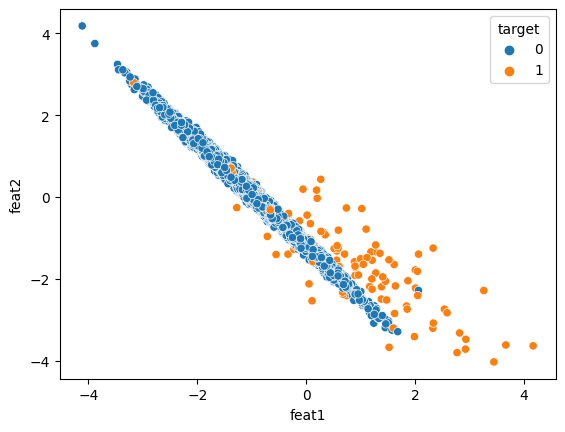

In [ ]:
sns.scatterplot(x='feat1', y='feat2', data=df_new, hue='target')

W pierwszym kroku stworzymy model regresji logistycznej na tych danych i sprawdzimy jego dokładność w przewidywaniu poszczególnych klas.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LogisticRegression(random_state=123)
model.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9905

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1970
           1       1.00      0.37      0.54        30

    accuracy                           0.99      2000
   macro avg       1.00      0.68      0.77      2000
weighted avg       0.99      0.99      0.99      2000



<Axes: >

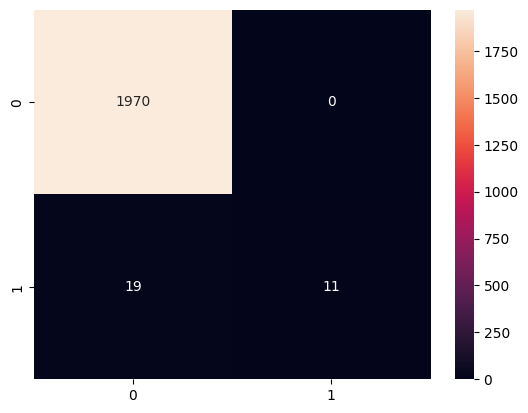

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

Patrząc na powyższe wyniki, widzimy, że dokładność modelu jest bardzo wysoka (98,7%), natomiast model nie jest praktycznie w stanie przewidzieć klasy 1. Dzieje się to z tego powodu, że klasy 0 jest dużo więcej i model idzie trochę na łatwiznę i przewiduje w większości przypadków 0.

## Oversampling

Pierwszą metodą jest Oversampling. Za jej pomocą możemy zwiększyć liczbę obserwacji w klasie mniej licznej za pomocą stworzenia duplikatów. Dzięki temu będziemy mieli taką samą liczbę obserwacji w obu klasach, natomiast poprzez tworzenie duplikatów nie uzyskamy żadnych nowych informacji dla modelu. W związku z tym metoda ta nie zawsze jest dobrym wyborem.

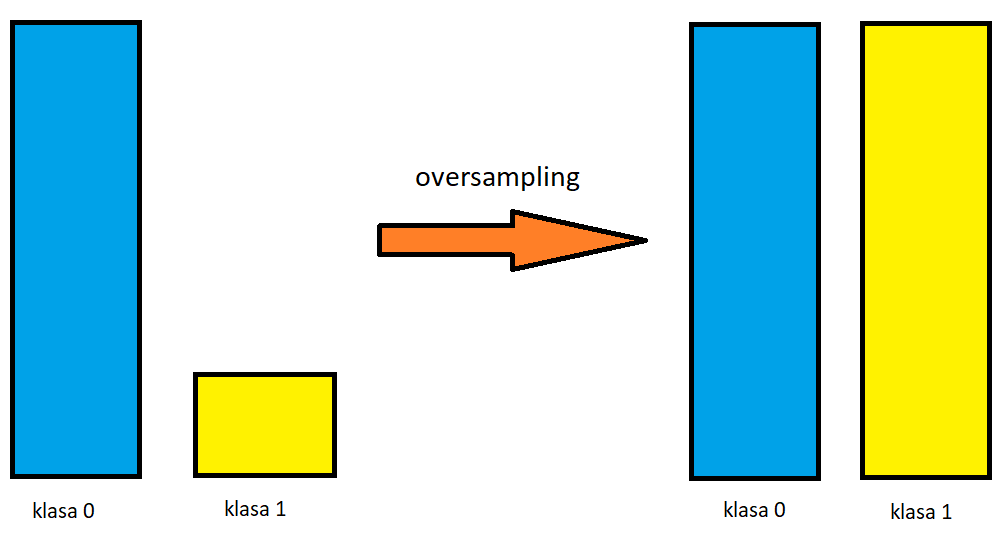

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# pobieramy Counter do sprawdzenia liczebności w zmiennej y
from collections import Counter

In [ ]:
# wykonujemy oversampling na danych treningowych
over = RandomOverSampler(random_state=123)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

In [ ]:
# sprawdzamy liczebność klas - widzimy, że po oversamplingu są tej samej wielkości
Counter(y_train_over)

Counter({0: 7876, 1: 7876})

In [ ]:
df_over = pd.DataFrame({'feat1':X_train_over[:,0], 'feat2':X_train_over[:,1], 'target':y_train_over})

Text(0.5, 1.0, 'Zbiór danych po oversamplingu')

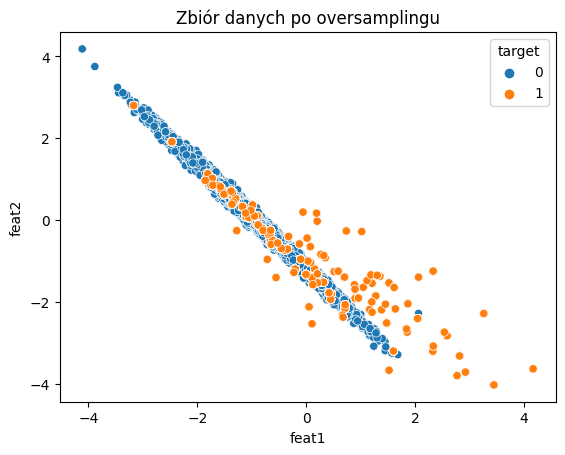

In [ ]:
sns.scatterplot(x='feat1', y='feat2', data=df_over, hue='target')
plt.title('Zbiór danych po oversamplingu')

In [ ]:
# sprawdzenie, czy są duplikaty wartości
df_over.duplicated().sum()

7752

In [ ]:
# model regresji logistycznej na danych po oversamplingu
model_over = LogisticRegression()
model_over.fit(X_train_over, y_train_over)

LogisticRegression()

In [ ]:
y_pred_over = model_over.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89      1970
           1       0.06      0.73      0.10        30

    accuracy                           0.81      2000
   macro avg       0.53      0.77      0.50      2000
weighted avg       0.98      0.81      0.88      2000



<Axes: >

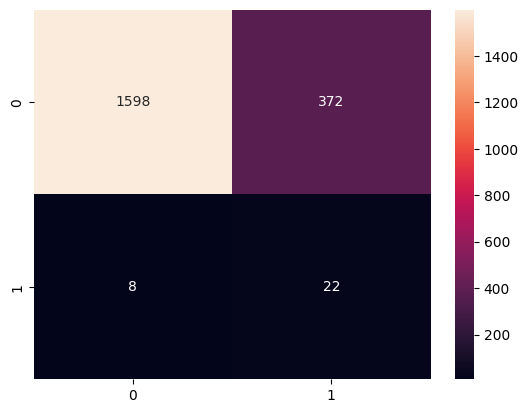

In [ ]:
cm = confusion_matrix(y_test, y_pred_over)
sns.heatmap(cm, annot=True, fmt='d')

Widzimy, że predykcja klasy 1 poprawiła się po oversamplingu, jednak nadal połowa obserwacji została błędnie zaklasyfikowana. Z drugiej strony również 286 obserwacji z klasy 0 zostało błędnie zaklasyfikowanych jako 1.

## Undersampling

Kolejną metodą jest Undersampling. W tej metodzie zmniejszamy liczebność klasy bardziej licznej do poziomu klasy mniej licznej. Wykonujemy to za pomocą wylosowania odpowiedniej liczby obserwacji. Ta metoda również nie jest uniwersalna, ponieważ w przypadku mocno niezbalansowanego zbioru, redukując liczebność jednej klasy, tracimy też mnóstwo cennych informacji. Zbiór danych po redukcji może być bardzo mały i nie dostarczać nam odpowiedniej liczby obserwacji do wykonania sensownych predykcji.

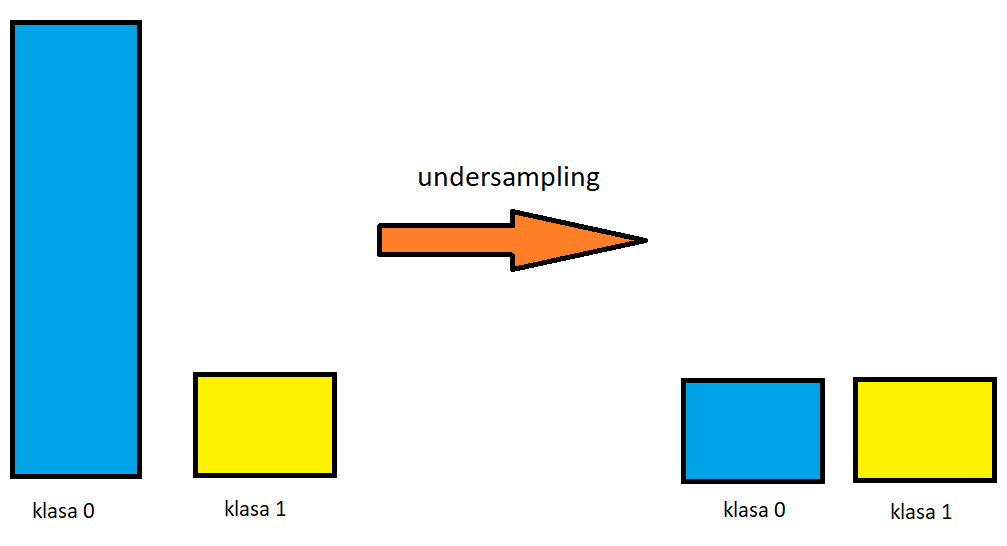

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
under = RandomUnderSampler(random_state=123)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_under)

Counter({0: 124, 1: 124})

In [ ]:
df_under = pd.DataFrame({'feat1':X_train_under[:,0], 'feat2':X_train_under[:,1], 'target':y_train_under})

Text(0.5, 1.0, 'Zbiór danych po undersamplingu')

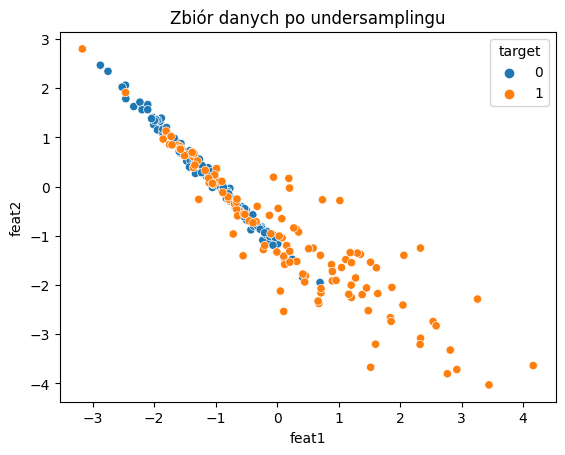

In [ ]:
sns.scatterplot(x='feat1', y='feat2', data=df_under, hue='target')
plt.title('Zbiór danych po undersamplingu')

In [ ]:
model_under = LogisticRegression()
model_under.fit(X_train_under, y_train_under)

LogisticRegression()

In [ ]:
y_pred_under = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_under))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1970
           1       1.00      0.37      0.54        30

    accuracy                           0.99      2000
   macro avg       1.00      0.68      0.77      2000
weighted avg       0.99      0.99      0.99      2000



<Axes: >

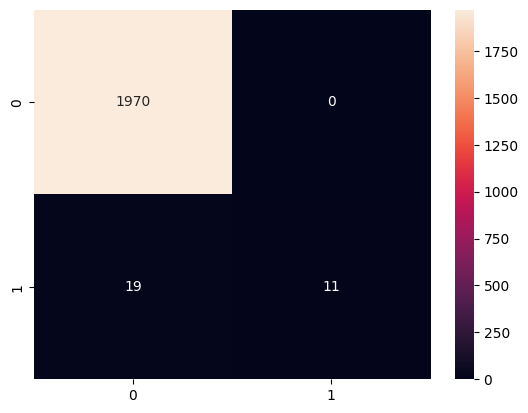

In [ ]:
cm = confusion_matrix(y_test, y_pred_under)
sns.heatmap(cm, annot=True, fmt='d')

Jak widzimy, wyniki po wykonaniu undersamplingu są identyczne jak w przypadku oryginalnego zbioru danych- w tym wypadku na metoda nie sprawdziła się.

## SMOTE

Kolejną metodą jest algorytm SMOTE- podobnie jak w przypadku Oversamplingu zostaje zwiększona liczebność mniej licznej klasy. W przypadku SMOTE wartości nie zostają zduplikowane, tylko zostają wygenerowane nowe wartości na płaszczyźnie wyznaczonej przez rzeczywiste punkty. Działanie tego algorytmu będzie dobrze zobrazowane na poniższym wykresie. Warto jednak pamiętać, że ten algorytm również ma swoje wady. Czasami nowe, sztucznie wygenerowane wartości mogą być błędne, w wyniku czego model będzie uczył się zależności na niepoprawnych wartościach. Jest to szczególnie istotne np. podczas pracy z danymi przestrzennymi, gdzie sztucznie wygenerowane współrzędne mogą nie istnieć, albo mogą się tam znajdować jakieś obiekty.

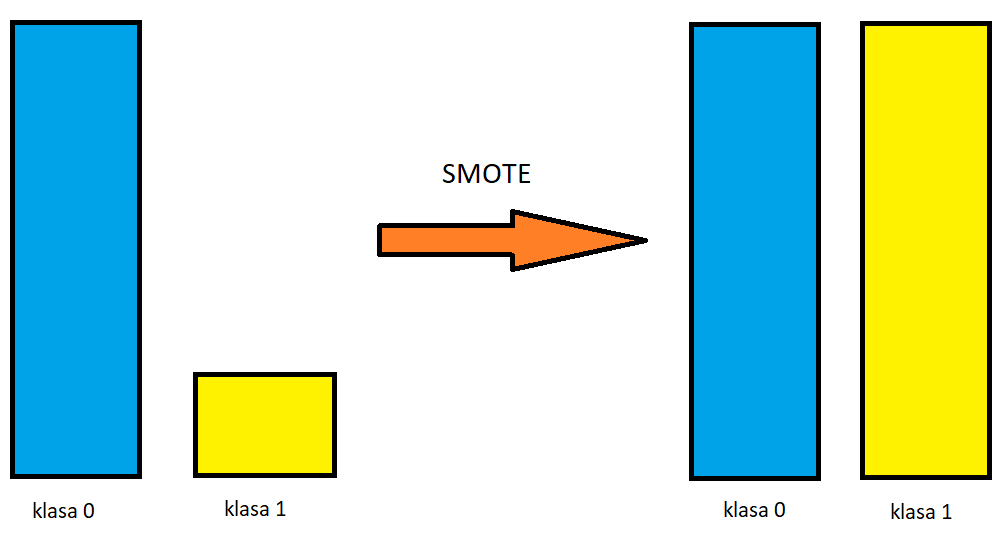

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_smote)

Counter({0: 7876, 1: 7876})

In [ ]:
df_smote = pd.DataFrame({'feat1':X_train_smote[:,0], 'feat2':X_train_smote[:,1], 'target':y_train_smote})

Text(0.5, 1.0, 'SMOTE')

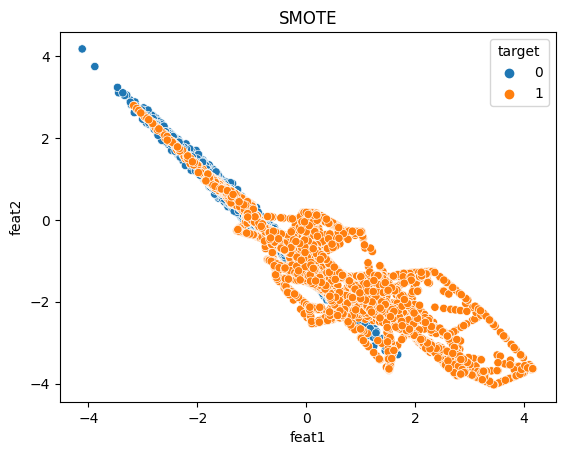

In [ ]:
sns.scatterplot(x='feat1', y='feat2', data=df_smote, hue='target')
plt.title('SMOTE')

Jak widzimy na powyższym wykresie, nowo powstałe punkty znajdują się w sąsiedztwie rzeczywistych pomarańczowych punktów.

In [ ]:
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [ ]:
y_pred_smote = model_smote.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90      1970
           1       0.06      0.77      0.12        30

    accuracy                           0.82      2000
   macro avg       0.53      0.80      0.51      2000
weighted avg       0.98      0.82      0.89      2000



W przypadku transformacji danych przy użyciu algorytmu SMOTE otrzymaliśmy takie same wyniki predykcji jak w przypadku Oversamplingu.

## class_weight

Ostatnim rozwiązaniem w sytuacji niezbalansowania zbioru danych jest nadanie wag poszczególnym klasom. Dzięki dobraniu odpowiednich wag, możemy wyrównać ważność obu klas, bądź oznaczyć, która klasa jest dla nas bardziej ważna. Wagi możemy zdefiniować ręcznie. Możemy również wykorzystać gotowy parametr `class_weight='balanced'`, który jest dostępny w większości algorytmów. Przy użyciu tego parametru, obie klasy zostaną zbalansowane pod kątem ich ważności.

In [ ]:
model_weight = LogisticRegression(class_weight = 'balanced')
model_weight.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred_weight = model_weight.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_weight))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90      1970
           1       0.06      0.73      0.11        30

    accuracy                           0.81      2000
   macro avg       0.53      0.77      0.50      2000
weighted avg       0.98      0.81      0.88      2000



W tym przypadku również otrzymaliśmy wyniki porównywalne z Oversamplingiem i algorytmem SMOTE.

# Podsumowanie

Regresja logistyczna jest jednym z najprostszych modeli klasyfikacyjnych. Dzięki swej efektywności i dużej skuteczności często jest wybierana do rozwiązywania prostych problemów binarnych.

Poniżej znajduje się tabelka z głównymi zaletami oraz wadami tego algorytmu oraz z podpowiedzią, kiedy należy stosować ten algorytm.

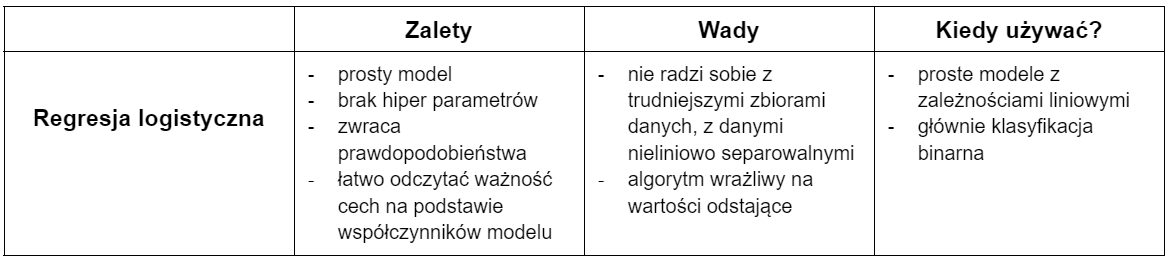

Zachęcam również do zapoznania się z dokumentacją techniczną [LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

# Zadanie

Wgraj zbiór danych *diabetes.csv*.

Zrób odpowiednie przekształcenia danych.

Sprawdź liczebność przewidywanej klasy.

Wykonaj 5 modeli predykcyjnych przy użyciu regresji logistycznej:
- z domyślnymi ustawieniami,
- z ustawionymi przez Ciebie parametrami dotyczącymi regularyzacji czy metody optymalizacji,
- wykorzystując 3 dowolne sposoby balansowania zbioru danych.

Dla każdego modelu sprawdź metryki predykcji i macierze pomyłek.
Narysuj krzywą ROC z wynikami z trzech najlepszych modeli predykcyjnych.

In [37]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error, accuracy_score

from sklearn.datasets import make_classification

from imblearn.over_sampling import RandomOverSampler

from collections import Counter

from imblearn.over_sampling import SMOTE

from sklearn.metrics import RocCurveDisplay

import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skin fold thickness   768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Diabetes pedigree function    768 non-null    float64
 7   Age                           768 non-null    int64  
 8   Class                         768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [4]:
diabetes.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive


In [5]:
diabetes.shape

(768, 9)

In [5]:
diabetes['Class'].unique()

array(['positive', 'negative'], dtype=object)

To build model let's convert column "Class" into numeric vales, like "positive"  = 1 and "negative" = 0

In [6]:
diabetes['Class'] = diabetes['Class'].replace({'positive': 1, 'negative': 0})

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skin fold thickness   768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Diabetes pedigree function    768 non-null    float64
 7   Age                           768 non-null    int64  
 8   Class                         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
diabetes['Class'].value_counts()

Class
0    500
1    268
Name: count, dtype: int64

We see that feature "Class" is not balanaced equally. Definetely there are more cases which are nor classified as diabetes almost doubled number of samples. Let's see how it will impact on Logistic Regression model.  

In [8]:
y = diabetes.pop('Class')
X = diabetes

In [9]:
# podział na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

##Logistic Regression

In [10]:
# inicjalizacja regresji logistycznej
model_1 = LogisticRegression()
# trenowanie modelu
model_1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred_1 = model_1.predict(X_test)

In [12]:
confusion_matrix(y_test, y_pred_1)

array([[87,  9],
       [23, 35]])

We see that 87 sample were correctly classifed as no diabetes, and 35 as diabetes. 23 of samples were wrongly classifed as non-diabetes while in fact those are diabetes.



In [13]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84        96
           1       0.80      0.60      0.69        58

    accuracy                           0.79       154
   macro avg       0.79      0.75      0.77       154
weighted avg       0.79      0.79      0.79       154



##Ridge regularization

In [14]:
alpha_values = [0.1, 1, 10, 100] #let's test different values of alpha

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)


    ridge_model.fit(X_train, y_train)


    y_pred_2 = ridge_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred_2)

    print(f"Alpha = {alpha}, MSE = {mse}")

Alpha = 0.1, MSE = 0.1541059236934424
Alpha = 1, MSE = 0.15409968997775952
Alpha = 10, MSE = 0.154099308847884
Alpha = 100, MSE = 0.15499424139087392


In [15]:
print("\nLogistic Regression:")
for alpha in alpha_values:
    logistic_model = LogisticRegression(penalty='l2', C=1/alpha, solver='lbfgs', max_iter=1000)

    # Dopasowanie modelu do danych treningowych
    logistic_model.fit(X_train, y_train)

    # Przewidywanie etykiet dla danych testowych
    y_pred_logistic = logistic_model.predict(X_test)

    # Obliczanie dokładności modelu
    accuracy = accuracy_score(y_test, y_pred_logistic)

    print(f"Alpha = {alpha}, Accuracy = {accuracy}")


Logistic Regression:
Alpha = 0.1, Accuracy = 0.8051948051948052
Alpha = 1, Accuracy = 0.8051948051948052
Alpha = 10, Accuracy = 0.8051948051948052
Alpha = 100, Accuracy = 0.8051948051948052


We see that alpha value has no impact on accuracy of model and MSE.

In [16]:
model = LogisticRegression(penalty='l2', solver='liblinear', C=0.9)
model.fit(X_train, y_train)

LogisticRegression(C=0.9, solver='liblinear')

In [17]:
y_pred = model.predict(X_test)

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[90  6]
 [21 37]]


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        96
           1       0.86      0.64      0.73        58

    accuracy                           0.82       154
   macro avg       0.84      0.79      0.80       154
weighted avg       0.83      0.82      0.82       154



After Ridge regularization we received slightly better results. But still we cannot state that our model is providing satisfactory results, because still diabetes are not classified "properly" - still some samples are wrongly classifed as no-diabetes.

Let's try use Oversampling.  

## Oversampling

In [20]:
# oversampling only on train data
over = RandomOverSampler(random_state=123)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

In [21]:
# after oversampling we see that we have equally splitted
Counter(y_train_over)

Counter({0: 404, 1: 404})

In [22]:
# Logistic regression model on data after oversampling
model_over = LogisticRegression()
model_over.fit(X_train_over, y_train_over)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred_over = model_over.predict(X_test)

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred_over)
print(conf_matrix)

[[76 20]
 [15 43]]


In [25]:
print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        96
           1       0.68      0.74      0.71        58

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.77      0.77       154



Oversampling is giving more "balanced" results.  Let's try to use it also SMOTE and Class Weight method.  

##SMOTE

In [26]:
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_smote)

Counter({0: 404, 1: 404})

In [27]:
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred_smote = model_smote.predict(X_test)

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred_smote)
print(conf_matrix)

[[73 23]
 [16 42]]


In [30]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        96
           1       0.65      0.72      0.68        58

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.75      0.75      0.75       154



##Class weight

In [31]:
model_weight = LogisticRegression(class_weight = 'balanced')
model_weight.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [32]:
y_pred_weight = model_weight.predict(X_test)

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred_weight)
print(conf_matrix)

[[74 22]
 [13 45]]


In [34]:
print(classification_report(y_test, y_pred_weight))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        96
           1       0.67      0.78      0.72        58

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154



Text(0.5, 1.0, 'ROC AUC - Logistic Regression model')

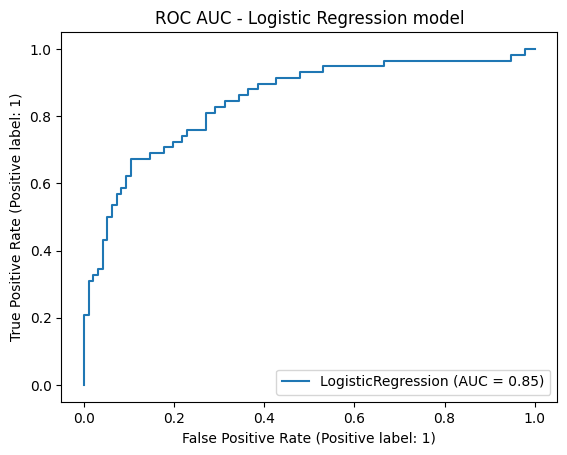

In [38]:
RocCurveDisplay.from_estimator(model_1, X_test, y_test) #for Logistic Regression
plt.title("ROC AUC - Logistic Regression model")

Text(0.5, 1.0, 'ROC AUC - SMOTE model')

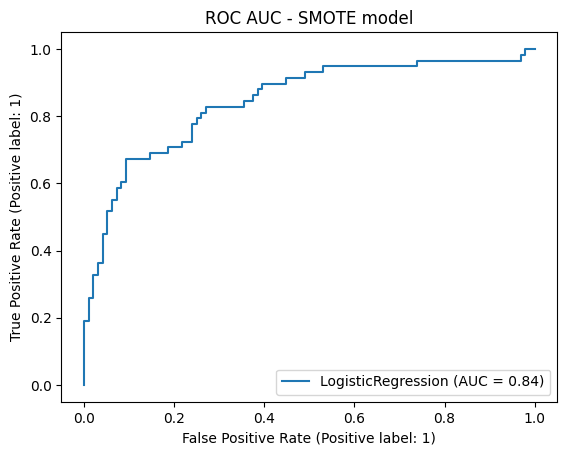

In [42]:
RocCurveDisplay.from_estimator(model_smote, X_test, y_test) # SMOTE
plt.title("ROC AUC - SMOTE model")

Text(0.5, 1.0, 'ROC AUC - Class weight model')

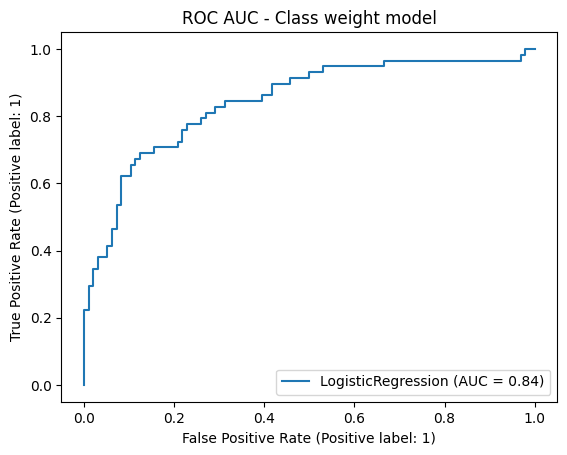

In [41]:
RocCurveDisplay.from_estimator(model_weight, X_test, y_test) # model_weight
plt.title("ROC AUC - Class weight model")

##Summary

-  in this data set we can see how important is properly balanced data set - poorly balanced data set may cause wrongly classification of data
- Oversampling, SMOTE, Class weight methods are improving classification for recognizing diabetes - AUC above 85% says that those models are properly classifing test values